In [1]:
# 2
# Question no 2
# Ashwanth GP
# 3122215001702


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc

In [ ]:
df=pd.read_csv("/content/sample_data/onlinefoods.csv")
df_encoded = pd.get_dummies(df)

df_encoded
df_encoded.columns

Index(['Age', 'Family size', 'latitude', 'longitude', 'Pin code',
       'Gender_Female', 'Gender_Male', 'Marital Status_Married',
       'Marital Status_Prefer not to say', 'Marital Status_Single',
       'Occupation_Employee', 'Occupation_House wife',
       'Occupation_Self Employeed', 'Occupation_Student',
       'Monthly Income_10001 to 25000', 'Monthly Income_25001 to 50000',
       'Monthly Income_Below Rs.10000', 'Monthly Income_More than 50000',
       'Monthly Income_No Income', 'Educational Qualifications_Graduate',
       'Educational Qualifications_Ph.D',
       'Educational Qualifications_Post Graduate',
       'Educational Qualifications_School',
       'Educational Qualifications_Uneducated', 'Output_No', 'Output_Yes',
       'Feedback_Negative ', 'Feedback_Positive', 'Unnamed: 12_No',
       'Unnamed: 12_Yes'],
      dtype='object')

In [ ]:
df['Marital Status'].replace({"Single":0},inplace=True)
df['Marital Status'].replace({"Married":1},inplace=True)
df['Marital Status'].replace({"Prefer not to say":None},inplace=True)

In [ ]:
df["Monthly Income"].replace({"No Income":0},inplace=True)
df["Monthly Income"].replace({"Below Rs.10000":5000},inplace=True) # median of income in this range
df["Monthly Income"].replace({"10001 to 25000":17500},inplace=True) # median of income in this range
df["Monthly Income"].replace({"25001 to 50000":37500},inplace=True) # median of income in this range
df["Monthly Income"].replace({"More than 50000":50000},inplace=True)

In [ ]:
df["Educational Qualifications"].replace({"Uneducated":0},inplace=True)
df["Educational Qualifications"].replace({"School":1},inplace=True)
df["Educational Qualifications"].replace({"Graduate":2},inplace=True)
df["Educational Qualifications"].replace({"Post Graduate":3},inplace=True)
df["Educational Qualifications"].replace({"Ph.D":4},inplace=True)

In [ ]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['Output'] = LabelEncoder().fit_transform(df['Output'])
df['Feedback'] = LabelEncoder().fit_transform(df['Feedback'])

In [ ]:
df.loc[df["Occupation"] == "Student"         ,"is working"] = 0
df.loc[df["Occupation"] == "Self Employeed"  ,"is working"] = 1
df.loc[df["Occupation"] == "Employee"        ,"is working"] = 1
df.loc[df["Occupation"] == "House wife"      ,"is working"] = 0

In [ ]:
one_enc_df = pd.DataFrame(OneHotEncoder().fit_transform(pd.DataFrame(df["Occupation"])).toarray())
df = pd.concat([df,one_enc_df],axis=1)


In [ ]:
df.rename(columns={
                     1:"is House wife",
                     0:"is Employee",
                     2:"is Self Employeed",
                     3:"is Student"} ,inplace=True)

In [ ]:
df.drop("Unnamed: 12",axis=1,inplace=True)

In [ ]:
df.drop(columns=["Occupation"],inplace=True)


In [ ]:
df['Marital Status'].fillna(random.randint(0,1),inplace=True)

In [ ]:
print(df)

     Age  Gender  Marital Status  Monthly Income  Educational Qualifications  \
0     20       0               0               0                           3   
1     24       0               0            5000                           2   
2     22       1               0            5000                           3   
3     22       0               0               0                           2   
4     22       1               0            5000                           3   
..   ...     ...             ...             ...                         ...   
383   23       0               0               0                           3   
384   23       0               0               0                           3   
385   22       0               0               0                           3   
386   23       1               0            5000                           3   
387   23       1               0               0                           3   

     Family size  latitude  longitude  

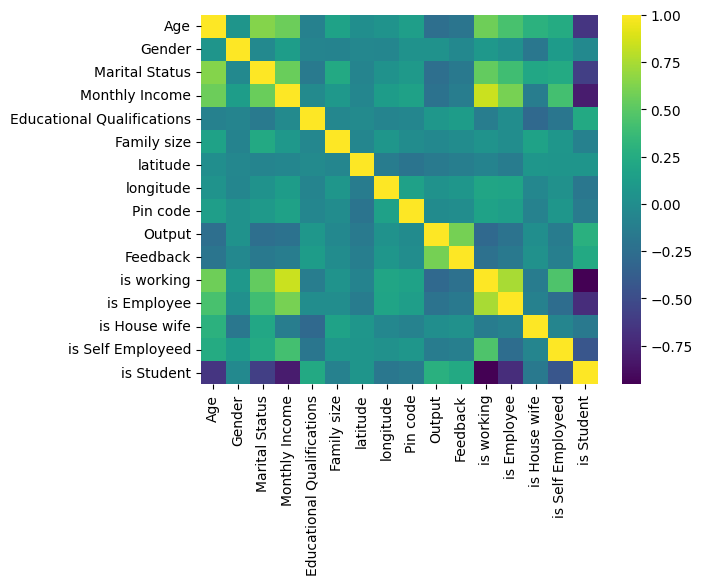

<Figure size 1000x800 with 0 Axes>

In [ ]:
sns.heatmap(df.corr(),annot=False,cmap='viridis')
plt.figure(figsize=(10,8))
plt.show()

In [ ]:
#sns.pairplot(df)

In [ ]:
x=df[df.drop('Monthly Income',axis=1).columns]
y=df['Monthly Income']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
print(x)
print(y)

     Age  Gender  Marital Status  Educational Qualifications  Family size  \
0     20       0               0                           3            4   
1     24       0               0                           2            3   
2     22       1               0                           3            3   
3     22       0               0                           2            6   
4     22       1               0                           3            4   
..   ...     ...             ...                         ...          ...   
383   23       0               0                           3            2   
384   23       0               0                           3            4   
385   22       0               0                           3            5   
386   23       1               0                           3            2   
387   23       1               0                           3            5   

     latitude  longitude  Pin code  Output  Feedback  is working  is Employ

In [ ]:
#SVM

In [ ]:
model=SVC(kernel='rbf',C=100,random_state=0,gamma=0.01)
model.fit(xtrain,ytrain)
y_pred = model.predict(xtest)

In [ ]:
print(accuracy_score(ytest,y_pred))

0.6837606837606838


In [ ]:
#GNN

In [ ]:
model=GaussianNB()
model.fit(xtrain,ytrain)
X_1=model.predict(xtest)

In [ ]:
print(accuracy_score(ytest,X_1))

0.7008547008547008


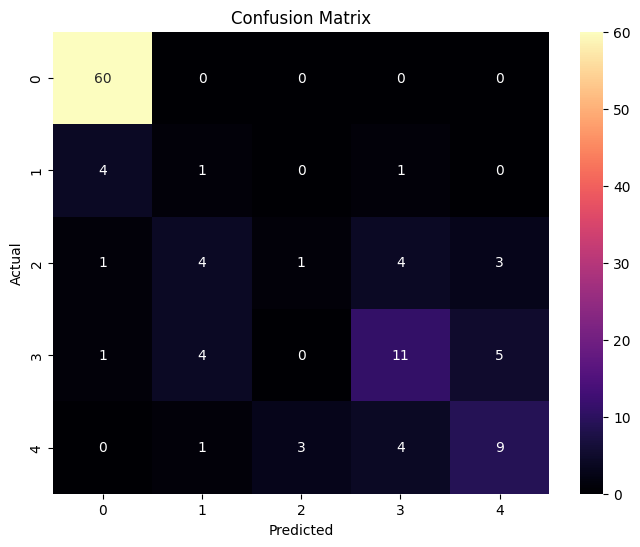

In [ ]:
conf_matrix = confusion_matrix(ytest, X_1)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#KNN
def applyKNN(x_train,y_train,x_test,metric_p):
  knn = KNeighborsClassifier(n_neighbors = 5,metric = metric_p)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  return y_pred
def apply_metrics(y_test,y_pred,metric_name):
  print(metric_name.upper())
  print("Predicted y_pred:- \n")
  print(y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy:", accuracy)
  print("Classification report:- \n",classification_report(y_test,y_pred))
  print("Confusion matrix :- \n",confusion_matrix(y_pred,y_test))



In [ ]:
vals = applyKNN(xtrain,ytrain,xtest,'manhattan')
apply_metrics(ytest,vals,'manhattan')
#plotROC(ytest,vals) #Does not work for multi-class problems ,Roc curve can perform only with 2 classes

MANHATTAN
Predicted y_pred:- 

[17500     0     0     0 37500     0     0     0 50000 37500 37500     0
 50000     0     0     0     0 37500     0     0     0     0     0     0
     0     0     0     0     0 17500     0     0 17500  5000     0 17500
     0     0     0     0     0  5000 17500     0     0 37500     0     0
 17500 37500     0 37500     0     0     0     0     0     0 37500 50000
 37500 50000 17500 17500     0 37500 50000 37500     0     0 50000     0
  5000     0     0     0 37500 50000     0 37500     0     0 17500     0
 37500 50000     0 50000     0 50000 37500     0     0     0 50000 17500
 50000 37500     0     0     0 37500 17500 37500 17500 17500     0 37500
     0     0 37500 50000     0 37500     0     0     0]
Accuracy: 0.5982905982905983
Classification report:- 
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        60
        5000       0.00      0.00      0.00         6
       17500       0.08      0.08     

In [ ]:
#Logistic Regression
model=LogisticRegression()
model.fit(xtrain,ytrain)
X_1=model.predict(xtest)

In [ ]:
print(accuracy_score(ytest,X_1))

0.5128205128205128


In [ ]:
#Perceptron Learning Algorithm
model=Perceptron()
model.fit(xtrain,ytrain)
X_1=model.predict(xtest)

In [ ]:
print(accuracy_score(ytest,X_1))

0.1794871794871795


In [ ]:
#Multi Layer Perceptron

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', learning_rate='adaptive', alpha=0.0001, batch_size=32)

model.fit(xtrain,ytrain)
X_1=model.predict(xtest)

In [ ]:
print(accuracy_score(ytest,X_1))

0.5128205128205128


In [ ]:
'''
Inference:
    Gaussian Naive Bayes performs with the best accuracy of 70%
    
'''